In [14]:
from os import *
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn import cross_validation, metrics
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [3]:
chdir('C:/Users/15651_000/Desktop/kaggle-titanic')

In [4]:
train = pd.read_csv('data/train.csv',index_col='PassengerId')
test = pd.read_csv('data/test.csv',index_col='PassengerId')

In [5]:
#DataPreprocessing
#choose training data to predict age
age_df = train[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train['Age'].notnull())]
age_df_isnull = age_df.loc[(train['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train.loc[train['Age'].isnull(), ['Age']]= predictAges

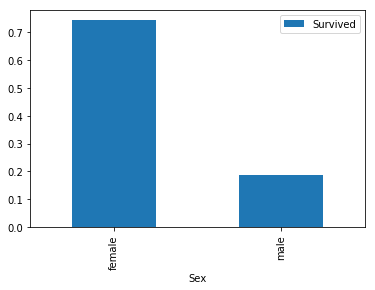

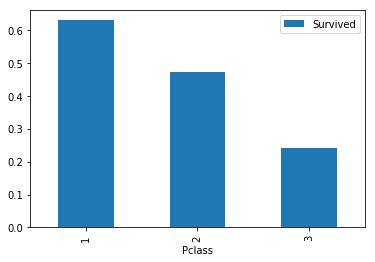

In [10]:
#ObserveData

#1. if survival ratio correlated with sex?
train.groupby(['Sex','Survived'])['Survived'].count()
#Sex Survived female 0 81 1 233 male 0 468 1 109 Name: Survived, dtype: int64
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

#2. if Pclass correlated with survival ratio?
train.groupby(['Pclass','Survived'])['Pclass'].count()
#Pclass Survived 1 0 80 1 136 2 0 97 1 87 3 0 372 1 119 Name: Pclass, dtype: int64
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

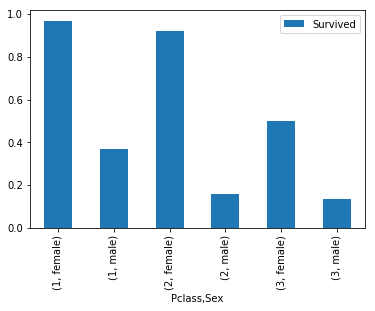

In [9]:
train[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [ ]:
#3.age and survival rate

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


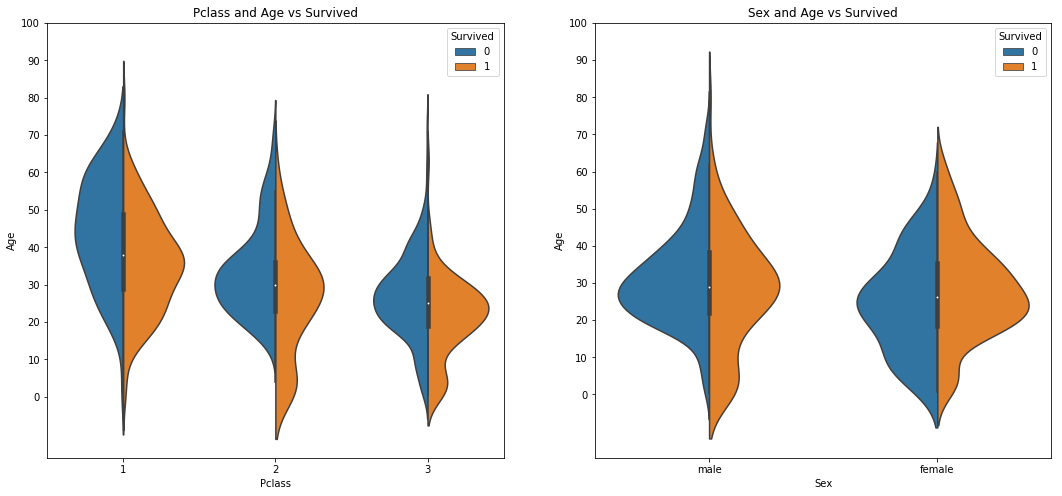

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

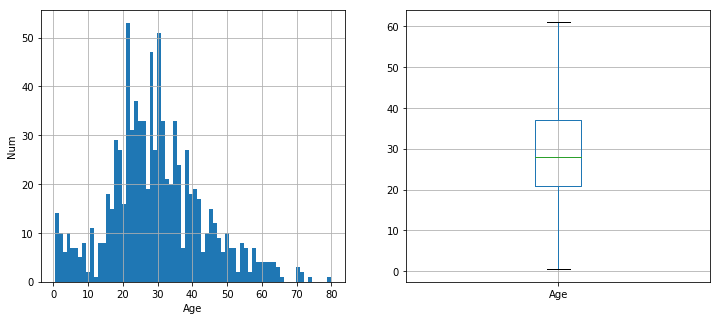

In [18]:
# analyse age distribution in population
plt.figure(figsize=(12,5))
plt.subplot(121)
train['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train.boxplot(column='Age', showfliers=False)
plt.show()


In [22]:
# 4. the relationship between title and survival rate
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


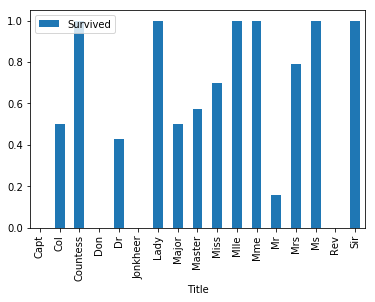

In [34]:
train[['Title','Survived']].groupby(['Title']).mean().plot.bar()

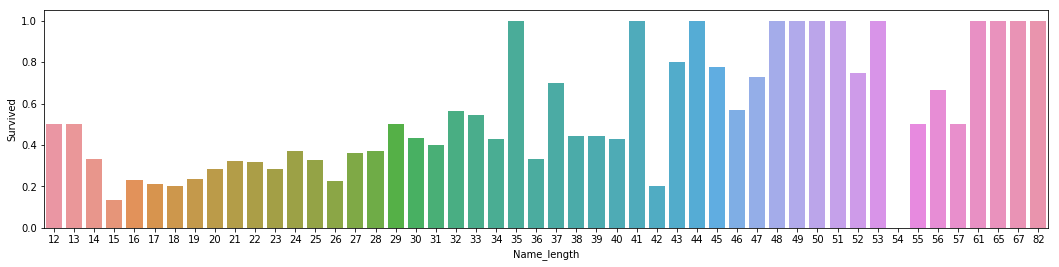

In [20]:
# analyse the relationship between the length of names and survival rate
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train['Name_length'] = train['Name'].apply(len)
name_length = train[['Name_length','Survived']].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=name_length)


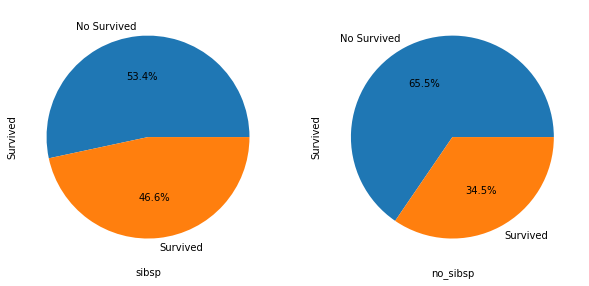

In [40]:
# 5. 有无兄弟姐妹和存活与否的关系 SibSp
# 将数据分为有兄弟姐妹的和没有兄弟姐妹的两组：
sibsp_df = train[train['SibSp'] != 0]
no_sibsp_df = train[train['SibSp'] == 0]
plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()


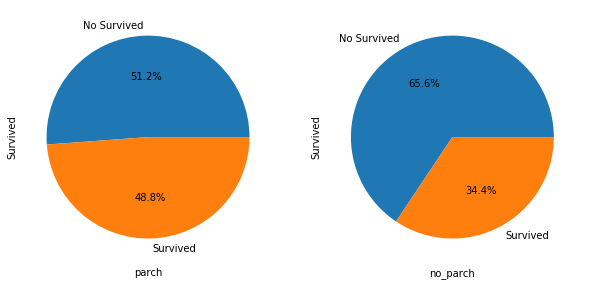

In [42]:
# 6 有无父母子女和存活与否的关系 Parch
parch_df = train[train['Parch'] != 0]
no_parch_df = train[train['Parch'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('parch')

plt.subplot(122)
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_parch')

plt.show()


Text(0.5, 1.0, 'SibSp and Survived')

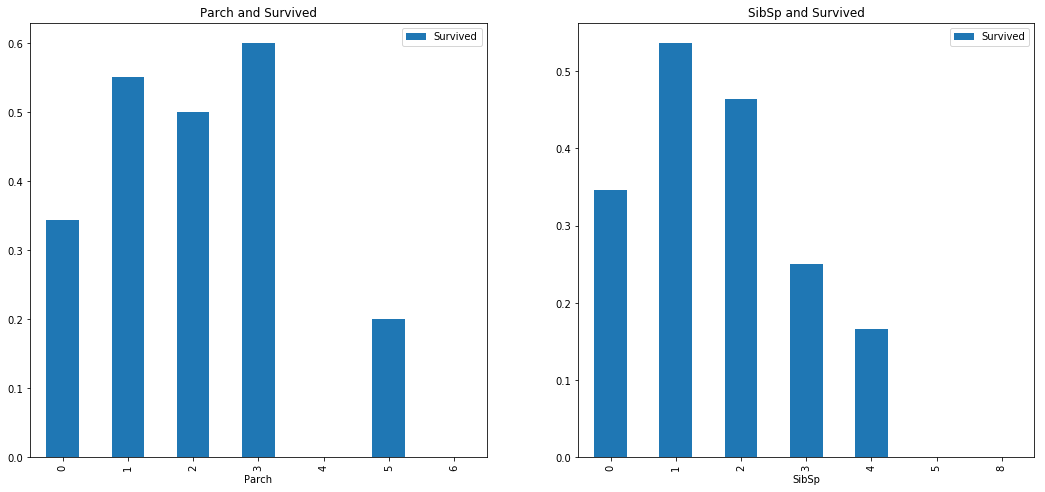

In [46]:
#(7) 亲友的人数和存活与否的关系 SibSp & Parch
fig,ax=plt.subplots(1,2,figsize=(18,8))
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')


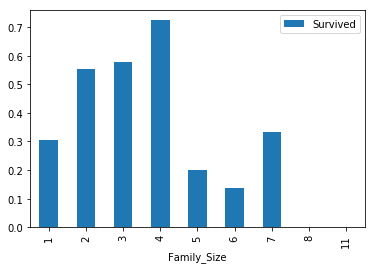

In [49]:
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1
train[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()


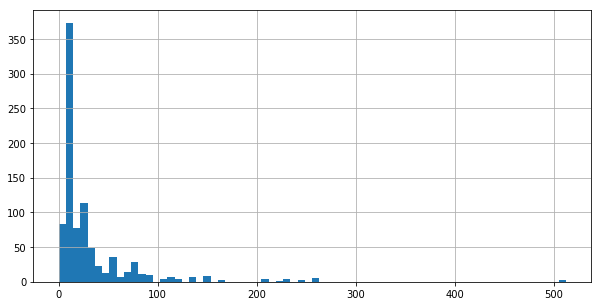

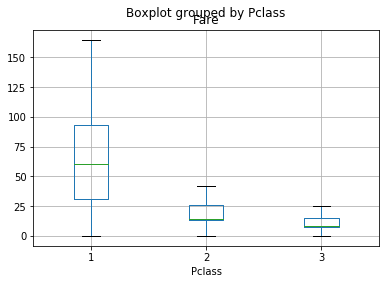

In [54]:
#(8) 票价分布和存活与否的关系 Fare
#首先绘制票价的分布情况：
plt.figure(figsize=(10,5))
train['Fare'].hist(bins = 70)

train.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()


In [57]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

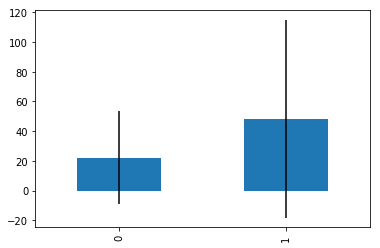

In [59]:
#绘制生存与否与票价均值和方差的关系：
train_data=train
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

plt.show()
